#### Notebook Set-up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import binom
import statsmodels.api as sm

In [2]:
m = pd.read_csv("./data/Medium_Clean.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Exploring the Data

In [4]:
m.head()

,Unnamed: 0,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Reading_Time,...,Tag_travel,Tag_trump,Tag_ux,Tag_venture-capital,Tag_web-design,Tag_web-development,Tag_women,Tag_wordpress,Tag_work,Tag_writing
0,2,Online Animation: Mixamo vs Norah AI,Online animations tools provide game designers...,1,Emma Laurent,NaN,2017,8,1,5,...,0,0,0,0,0,0,0,0,0,0
1,5,A.I. ?,NaN,0,Sanparith Marukatat,NaN,2017,8,1,2,...,0,0,0,0,0,0,0,0,0,0
2,11,"Futures of AI, Friendly AI?",From Physics of the Future: How Science Will S...,1,Z,NaN,2017,8,1,3,...,0,0,0,0,0,0,0,0,0,0
3,12,The Value Generated through AI led Mindfulness,A true product co-created by the Millennials,1,Emiko Sawaguchi,MILLENNIALSTIMES,2017,8,1,5,...,0,0,0,0,0,0,0,0,0,0
4,17,"Os Melhores Links de JulhoCmeras Vintage, Goog...",mas pera a?,1,Giovani Ferreira,NEW ORDER,2017,8,1,3,...,0,0,0,0,0,0,0,0,0,0


In [5]:
m.shape

(1391033, 108)

In [6]:
#null_cols
null_cols = m.isnull().sum()
null_cols[null_cols > 0]

Title           48813
Subtitle       440557
Publication    971655
dtype: int64

In [7]:
m.columns

Index(['Unnamed: 0', 'Title', 'Subtitle', 'Image', 'Author', 'Publication',
       'Year', 'Month', 'Day', 'Reading_Time',
       ...
       'Tag_travel', 'Tag_trump', 'Tag_ux', 'Tag_venture-capital',
       'Tag_web-design', 'Tag_web-development', 'Tag_women', 'Tag_wordpress',
       'Tag_work', 'Tag_writing'],
      dtype='object', length=108)

In [8]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391033 entries, 0 to 1391032
Columns: 108 entries, Unnamed: 0 to Tag_writing
dtypes: float64(1), int64(101), object(6)
memory usage: 1.1+ GB


In [9]:
# Descriptive Stats Table
m[['Unnamed: 0', 'Title', 'Subtitle', 'Image', 'Author', 'Publication',
  'Year', 'Month', 'Day', 'Reading_Time', "Claps"]].describe()

,Unnamed: 0,Image,Year,Month,Day,Reading_Time,Claps
count,1.391033e+06,1.391033e+06,1.391033e+06,1.391033e+06,1.391033e+06,1.391033e+06,1.391033e+06
mean,7.899109e+04,6.174512e-01,2.017608e+03,6.391335e+00,1.573437e+01,3.630148e+00,1.092326e+02
std,1.185557e+05,4.860097e-01,4.882375e-01,3.409542e+00,8.816255e+00,3.385274e+00,1.039822e+03
min,0.000000e+00,0.000000e+00,2.017000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.562000e+03,0.000000e+00,2.017000e+03,3.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,2.073400e+04,1.000000e+00,2.018000e+03,6.000000e+00,1.600000e+01,3.000000e+00,1.000000e+00
75%,8.975000e+04,1.000000e+00,2.018000e+03,9.000000e+00,2.300000e+01,5.000000e+00,3.600000e+01
max,4.375080e+05,1.000000e+00,2.018000e+03,1.200000e+01,3.100000e+01,5.150000e+02,2.910000e+05


In [10]:
# Correlation Table
m[['Unnamed: 0', 'Title', 'Subtitle', 'Image', 'Author', 'Publication',
  'Year', 'Month', 'Day', 'Reading_Time', "Claps"]].corr()

,Unnamed: 0,Image,Year,Month,Day,Reading_Time,Claps
Unnamed: 0,1.000000,0.114647,0.022086,-0.009662,0.002492,0.062328,0.069984
Image,0.114647,1.000000,0.019520,-0.016535,-0.004010,0.136924,0.048623
Year,0.022086,0.019520,1.000000,-0.848944,-0.004944,0.017663,0.010128
Month,-0.009662,-0.016535,-0.848944,1.000000,-0.000315,-0.010752,-0.009464
Day,0.002492,-0.004010,-0.004944,-0.000315,1.000000,-0.000565,0.000384
Reading_Time,0.062328,0.136924,0.017663,-0.010752,-0.000565,1.000000,0.077830
Claps,0.069984,0.048623,0.010128,-0.009464,0.000384,0.077830,1.000000


In [13]:
# Testing the difference an image makes
img = m[m["Image"]==0]
m[m['Image']==1]["Claps"].corr(m[m["Image"]==0]['Claps'])

nan

#### General Information

In [20]:
# General info:
print("Number of Articles: ", m.shape[0])
print("Number of Authors: ", m.Author.value_counts().shape[0])
print("Number of Publications: ", m.Publication.value_counts().shape[0])
print("Number of Tags: ", m.columns[13:].shape[0])

Number of Articles:  1391033
Number of Authors:  351584
Number of Publications:  43045
Number of Tags:  95


In [3]:
# List of tags:
tags = [t for t in m.columns[13:]]

### Data Cleaning

In [3]:
#checking how many articles have more than one tag
tags_df = m.reindex([t for t in m.columns[13:]], axis="columns")
tsum = tags_df.sum(axis=1)
tsum.max()
tsum[tsum > 1].count()

437509

In [4]:
# 30 % of my data has more than one tag
tsum[tsum > 1].count()/m.shape[0]*100

31.452093516113568

In [4]:
# I decide to not include those articles in my analysis due to the increased dificulty
drop_rows = list(tsum[tsum > 1].index)
m = m.drop(drop_rows, axis=0)

In [6]:
# Succesfully dropped the rows I didn't want
m.shape

(953524, 108)

In [55]:
# Second check that the drop worked
tags_df = m.reindex([t for t in m.columns[13:]], axis="columns")
tsum = tags_df.sum(axis=1)
tsum.max()
tsum[tsum > 1].count()

0

### Tag Exploration

In [ ]:
# Creating a new column with the tags so that it's easier to compare
lst = [m.index(c) for t in tags for c in m[t] if c==1]
#lst = [m.at[t][i] for t in tags for i in range(len(m)-1) if m[t][i]==1]
lst

### Date Exploration

AttributeError: 'AxesSubplot' object has no property 'figsize'

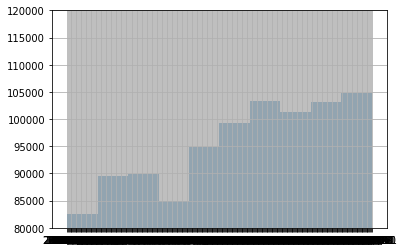

In [14]:
# Inspecting by date

# Creating a new column with Date
m["Date"] = m["Year"].astype(str) + "/" + m["Month"].astype(str)+ "/" + m["Day"].astype(str).str.zfill(2)
ax = m["Date"].hist()
#ax = plt.hist(m["Date"])
ax.set(ylim=(80000, 120000), figsize=(12,8))
#ax.ylim(8000, 12000)
ax.set_title("Articles published per date")
ax.xlabel("Date")
ax.ylabel("Number of Articles")
ax.grid(False)
ax

In [10]:
m["Date"].max()
m["Date"].min()

'2017/10/01'

In [ ]:
plt.hist(m["Date"],m["Date"].count())
#plt.axis([8000, 12000, "2017/10/01","2018/8/01"])
plt.xlim(8000, 12000)
plt.show()

### Claps Distribution

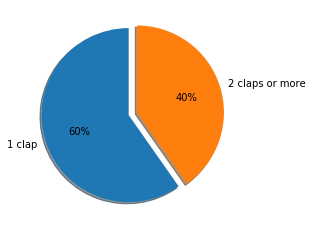

In [20]:
# How many articles had a few claps vs many claps
x = m[m["Claps"]<2]
y = m[m["Claps"]>=2]

labels = ['1 clap', '2 claps or more']
sizes = [len(x)/len(m), len(y)/len(m)] # sizes of each section
explode = [0, 0.1] # distance from the centre for each section

plt.pie(sizes, labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
# could also be a 1x1 subplot
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
# ax1.axis('equal')
plt.show()

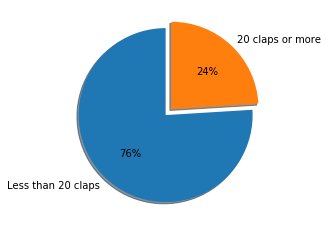

In [23]:
x = m[m["Claps"]<20]
y = m[m["Claps"]>=20]

labels = ['Less than 20 claps', '20 claps or more']
sizes = [len(x)/len(m), len(y)/len(m)] # sizes of each section
explode = [0, 0.1] # distance from the centre for each section

plt.pie(sizes, labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
# could also be a 1x1 subplot
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
# ax1.axis('equal')
plt.show()

In [30]:
m.head(1)

,Unnamed: 0,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Reading_Time,...,Tag_travel,Tag_trump,Tag_ux,Tag_venture-capital,Tag_web-design,Tag_web-development,Tag_women,Tag_wordpress,Tag_work,Tag_writing
0,2,Online Animation: Mixamo vs Norah AI,Online animations tools provide game designers...,1,Emma Laurent,NaN,2017,8,1,5,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# General stats about claps:
print("Total n. of claps: ", sum(m["Claps"]))
print("Max claps for  one article: ", m["Claps"].max())
print("Max claps for one author: ", m.groupby(["Author"]).sum()["Claps"].max())
print("Average number of claps: ", m["Claps"].mean())
print("Median number of claps: ", m["Claps"].median())
print("Standard deviation of the number of claps: ", m["Claps"].std())
print("90% of articles obtain", m["Claps"].quantile(0.9), "claps or less")
print("70% of articles obtain", m["Claps"].quantile(0.7), "claps or less")

Total n. of claps:  62535925.0
Max claps for  one article:  172000.0
Max claps for one author:  755499.0
Average number of claps:  65.58400732440924
Median number of claps:  0.0
Standard deviation of the number of claps:  673.4152414500617
90% of articles obtain 104.0 claps or less
70% of articles obtain 8.0 claps or less


[None]

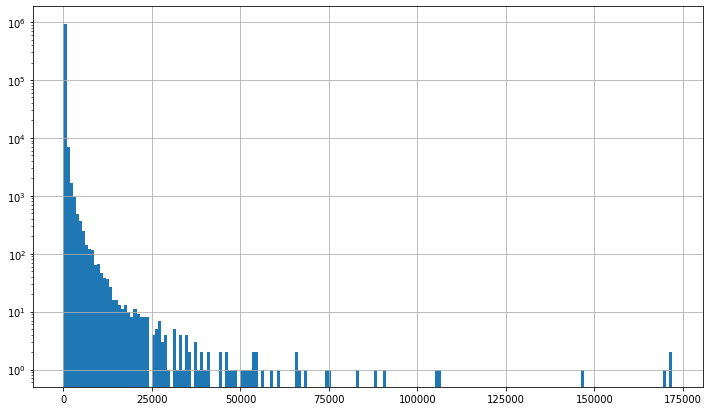

In [17]:
# What percentage of the data has what percentage of the claps
l = []
#.map(lambda x: x**0.01 if x>0 else 0)
ax = m["Claps"].hist(bins=200, figsize=(12,7))
ax.set(yscale="log")

In [76]:
# Does the 1% have it all?
print("99% of the articles have", m["Claps"].quantile(0.99), "claps or under")

print("Number of articles with more than 1000 claps:", m[m["Claps"]>1000].count()[0])
print("Number of articles with 1000 claps or less:", m[m["Claps"]<=1000].count()[0])

a = (m[m["Claps"]>1000].count()[0])/(m[m["Claps"]<=1000].count()[0])*100
print("99% of the claps belong to", round(a, 2), "% of the articles")

99% of the articles have 1000.0 claps or under
Number of articles with more than 1000 claps: 8361
Number of articles with 1000 claps or less: 945163
99% of the claps belong to 0.88 % of the articles


In [ ]:
# Plotting the results


### Claps per Author

In [5]:
a = m.pivot_table(index=["Author"], 
                  values=["Claps", "Unnamed: 0"],
                  aggfunc={'Claps': (np.sum, np.mean), 'Unnamed: 0': 'count'}).reset_index()
#aggfunc={'Salary': np.mean, 'Name': len}
a_sorted = a.sort_values([("Claps", "sum")], ascending=True)
a_sorted.head(10)

Author Claps      Unnamed: 0
                                     mean  sum      count
289918             lillian lawrence   0.0  0.0          1
111696      Intelliware Development   0.0  0.0          5
111697                     Intellyo   0.0  0.0          5
111700         Intensacut Forskolin   0.0  0.0          1
111701                 Intense Kart   0.0  0.0          1
111703          Intensive Lessons4u   0.0  0.0          1
111704          Intention to Detail   0.0  0.0          1
111695                 Intelliverse   0.0  0.0          4
111706  Intentionally Inspirational   0.0  0.0         10
111708               Intentlabs Seo   0.0  0.0         14

In [77]:
# I discover that there is an unnamed author that messes up the stats
a.nlargest(1, [("Unnamed: 0", "count")])

Author      Claps           Unnamed: 0
               mean       sum      count
0         31.355626  178633.0       5697

In [6]:
# I decide to drop the unamed authors from the pivot table to better analyse the authors data
a = a.drop(0)

# Test
a.nlargest(1, [("Unnamed: 0", "count")])

Author      Claps          Unnamed: 0
                                 mean      sum      count
144702  Klaus-Dieter Thill  22.442733  23318.0       1039

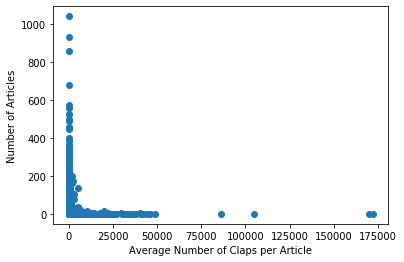

In [8]:
# Plotting the values
plt.scatter(a[("Claps", "mean")], a[("Unnamed: 0", "count")])
plt.xlabel("Average Number of Claps per Article")
plt.ylabel("Number of Articles")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027456D5AC88>]],
      dtype=object)

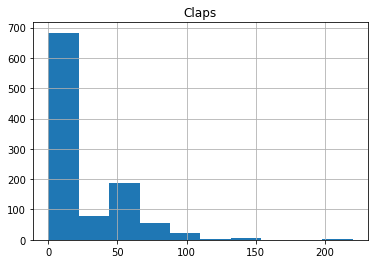

In [17]:
top_au = m[m["Author"]=="Klaus-Dieter Thill"]
top_au[["Claps"]].hist()

#### Articles per Author

In [18]:
print("Average number of articles per author:", a[("Unnamed: 0", "count")].mean())
print("Median number of articles per author:", a[("Unnamed: 0", "count")].median())
print("Only 5% of the authors write more than", a[("Unnamed: 0", "count")].quantile(.95), "articles")
print("Only", round(len(a[a[("Unnamed: 0", "count")]>1])/len(a)*100, 1), "% of the authors write more than 1 article")
print("max number of articles per author:", a[("Unnamed: 0", "count")].max())

Average number of articles per author: 3.156056872669153
Median number of articles per author: 1.0
Only 5% of the authors write more than 10.0 articles
Only 44.9 % of the authors write more than 1 article
max number of articles per author: 1039


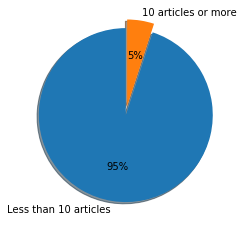

In [36]:
# Plotting the data

labels = ['Less than 10 articles', '10 articles or more']
sizes = [95, 5] # sizes of each section
explode = [0, 0.1] # distance from the centre for each section

plt.pie(sizes, labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
# could also be a 1x1 subplot
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
# ax1.axis('equal')
plt.show()

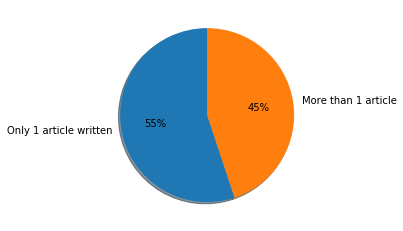

In [39]:
# Plotting the data

labels = ['Only 1 article written', 'More than 1 article']
sizes = [55.1, 44.9] # sizes of each section
#explode = [0, 0.1] # distance from the centre for each section

plt.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
# could also be a 1x1 subplot
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
# ax1.axis('equal')
plt.show()

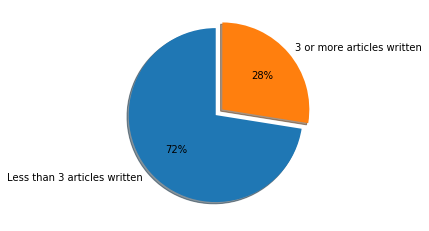

In [7]:
x = a[a[("Unnamed: 0", "count")]<3]
y = a[a[("Unnamed: 0", "count")]>=3]

labels = ['Less than 3 articles written', '3 or more articles written']
sizes = [len(x)/len(a), len(y)/len(a)] # sizes of each section
explode = [0, 0.1] # distance from the centre for each section

plt.pie(sizes, labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
# could also be a 1x1 subplot
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.0f%%', explode=explode, shadow=True, startangle=90)
# ax1.axis('equal')
plt.show()

#### What metrics define success for an author

In [86]:
a.head(1)

Author Claps       Unnamed: 0
                                   mean   sum      count
1    A Small Pototo in Jinrongjie  15.0  15.0          1

In [11]:
print("Correlation between average claps and number of claps:", round(a[("Claps", "mean")].corr(a[("Unnamed: 0", "count")]), 4))

Correlation between average claps and number of claps: 0.0035


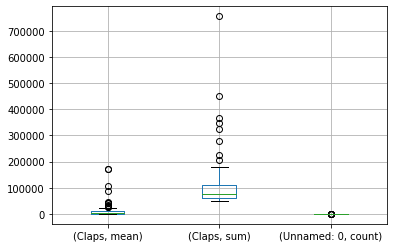

In [101]:
a.nlargest(100, [("Claps", "sum")]).boxplot()

### Probabable Claps 

In [ ]:
binom.pmf(1, 0.3)

### Hypothesis
The more you publish the more claps in average you will get:

H1 = the greater the number of articles the greater the average number of claps
H0 = the number of articles has no impact on the number of claps

H1 = total claps / number of articles A > total claps / number of articles B, if number of articles A > number of articles B    
H0 = total claps / number of articles A <= total claps / number of articles B, if number of articles A > number of articles B

In [ ]:
#stat, pval = ttest_1samp(a[""], 5.7)
#ttest_rel(blood_pressure.after, blood_pressure.before)

In [110]:
x = sm.add_constant(a[a[("Unnamed: 0", "count")]])
model = sm.OLS(a[a[("Claps", "mean")]],x)
results = model.fit()
results.summary()

NotImplementedError: Index._join_level on non-unique index is not implemented

### What metrics are most important for success
Take a look only at the succesful articles (aka claps>50, or top 10%)

Metrics such as: tags, date, count of articles published, publication, etc.

In [51]:
top = m[m["Claps"]>1000]
print("Sample size:", round(len(top)/len(m)*100, 2), "percent")

Sample size: 0.88 percent


In [52]:
top[['Unnamed: 0', 'Title', 'Subtitle', 'Image', 'Author', 'Publication',
  'Year', 'Month', 'Day', 'Reading_Time', "Claps"]].corr()

,Unnamed: 0,Image,Year,Month,Day,Reading_Time,Claps
Unnamed: 0,1.000000,0.012085,0.624832,-0.303752,0.033980,-0.093515,-0.009465
Image,0.012085,1.000000,0.027193,-0.009400,0.008315,0.071530,0.034880
Year,0.624832,0.027193,1.000000,-0.855103,-0.043766,-0.035278,-0.015693
Month,-0.303752,-0.009400,-0.855103,1.000000,0.007801,0.030672,0.012851
Day,0.033980,0.008315,-0.043766,0.007801,1.000000,-0.014441,-0.010642
Reading_Time,-0.093515,0.071530,-0.035278,0.030672,-0.014441,1.000000,0.086179
Claps,-0.009465,0.034880,-0.015693,0.012851,-0.010642,0.086179,1.000000
